###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

==> 인터넷 옷 쇼핑몰로 가정하고 실습 과제 수행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
######################### 고객 속성 데이터 생성을 위한 random Field 생성
CustID=np.arange(10001, 11001)                                                                                         ## 고객 ID
Gender=np.random.choice(2, size=1000)                                                                                   ## 고객 Gender Female: 0, Male: 1 # gender=np.random.randint(2, size=1000) 동일
Age=np.random.randint(10,101, size=1000)                                                                                ## 고객 나이 10~100세
Region=np.random.randint(1,11, size=1000)                                                                               ## 구매 고객 지역: 1~10 지역

######################### 고객 속성 DATAFRAME 생성
DF_Customers=pd.DataFrame(np.column_stack([CustID, Gender, Age, Region]), columns=['CustID', 'Gender', 'Age', 'Region'])


#########################  상품 ID 및 가격 정보 DB 생성
## Product ID 생성 (1~30)
ProdID = np.arange(10, 40)

# 상품 코드에 따른 가격 생성 (최소 단위 100원)
Price=[]
## 저가 상품 (1000~16300), 중가 상품 (16300~32600), 가 상품 (32600~50000) 생성
Price.extend(np.random.randint(337, 501, size=10)*100)
Price.extend(np.random.randint(174, 337, size=10)*100)
Price.extend(np.random.randint(10, 174, size=10)*100)

# 생성된 가격을 이용하여 DF_Prods 데이터프레임 생성
DF_Prods = pd.DataFrame({'ProdID': ProdID, 'Price': Price})

#########################  거래 데이터 생성을 위한 Random Field 생성
OrderID=np.arange(1, 10001)
CustID=np.random.randint(10001, 11001, size=10000)                                                                      ## 주문 ID
OrderDate=np.random.choice(pd.date_range(start='2020-01-01',end='2021-12-31', freq='D', normalize=True), size=10000)    ## 주문 시간
OrderDW=pd.to_datetime(OrderDate).day_name()                                                                            ## 주문 시간: 요일
ProdID=np.random.randint(10,40, size=10000)                                                                              ## 주문 상품 ID
Quantity=np.random.randint(1,101, size=10000)                                                                           ## 상품 주문 갯수
OrderTime = np.random.randint(1, 25, size=10000)                                                                        ## 주문 시간
# 주문 시간을 OrderDate 배열에 반영
OrderDate = [date + pd.Timedelta(hours=time) for date, time in zip(OrderDate, OrderTime)]


DF_Orders = pd.DataFrame({
    'OrderID': OrderID, 'CustID': CustID, 'OrderDate': OrderDate,'OrderDW': OrderDW,
    'ProdID': ProdID, 'Quantity': Quantity, 'OrderTime': OrderTime
})

#########################  고객 정보를 담은 1000 entries의 DF_Customers 와 주문 정보를 담은 10000 entries의 DF_Orders 통합 데이터 프레임 생성
# DF_Customers와 DF_Orders를 CustID 열을 기준으로 Merge ==> 고객/주문 정보 통합 DataFrame
MergedDF = pd.merge(DF_Orders, DF_Customers, on='CustID', how='left')

# IntegOrders에 ProdID에 해당하는 가격을 DF_Prods에서 가져와서 Price 컬럼 생성
IntegOrders = MergedDF.merge(DF_Prods, on='ProdID', how='left')

# OrderAmount 계산하여 OrderAmount 컬럼 추가
IntegOrders['OrderAmount'] = IntegOrders['Price'] * IntegOrders['Quantity']

IntegOrders.head()

,OrderID,CustID,OrderDate,OrderDW,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
0,1,10679,2020-05-30 21:00:00,Saturday,26,31,21,1,98,3,32900,1019900
1,2,10269,2020-10-11 21:00:00,Sunday,14,52,21,1,77,4,35700,1856400
2,3,10577,2020-12-10 08:00:00,Thursday,19,79,8,1,54,8,48800,3855200
3,4,10895,2021-06-01 00:00:00,Monday,35,34,24,0,13,4,3300,112200
4,5,10765,2021-08-19 15:00:00,Thursday,11,11,15,1,25,9,43500,478500


In [ ]:
print(IntegOrders.info())
print(IntegOrders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      10000 non-null  int64         
 1   CustID       10000 non-null  int64         
 2   OrderDate    10000 non-null  datetime64[ns]
 3   OrderDW      10000 non-null  object        
 4   ProdID       10000 non-null  int64         
 5   Quantity     10000 non-null  int64         
 6   OrderTime    10000 non-null  int64         
 7   Gender       10000 non-null  int64         
 8   Age          10000 non-null  int64         
 9   Region       10000 non-null  int64         
 10  Price        10000 non-null  int64         
 11  OrderAmount  10000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 937.6+ KB
None
           OrderID        CustID                   OrderDate        ProdID  \
count  10000.00000  10000.000000                   

#### Data Review
  - 우선 가동된 data라 결측치나 후처리가 필요한 data는 없음



#### Data 분석

  (1) Gender<br>
    - 성별에 따른 구매력 및 선호 상품 금액대를 비교 <br>
        * 난수로 생성된 data라 실재 data에서 보여야할 skew가 전혀 반영이 안됨 <br>
        * 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가<br>
        * 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정

In [ ]:
# 1-1: 남/여에 따른 구매력 (구매 횟수) 비교
OrderFreq_Gender = IntegOrders.groupby('Gender')['OrderID'].count()

# 1-2: 남/여에 따른 구매력 (평균 구매액) 비교
AvgAmount_Gender = IntegOrders.groupby('Gender')['OrderAmount'].mean()


# 1-3: 남/여에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders['PriceCategory'] = IntegOrders['Price'].apply(Price_Categ)
PriceDistrib_Gender = IntegOrders.groupby(['Gender', 'PriceCategory']).size()
PriceDistrib_Gender = PriceDistrib_Gender.unstack()

# Plot 비교
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
OrderFreq_Gender.plot(kind='bar', color='bisque')
plt.title('Order-Frequency vs. Gender')
plt.ylabel('Order-Frequency')

plt.subplot(1, 3, 2)
AvgAmount_Gender.plot(kind='bar', color='lightgrey')
plt.title('Average-Amount vs. Gender')
plt.ylabel('Average-Amount')

plt.subplot(1, 3, 3)
PriceDistrib_Gender.loc[0].plot(kind='bar', color='r', width=0.4, position=0, label='Female')
PriceDistrib_Gender.loc[1].plot(kind='bar', color='b', width=0.4, position=1, label='Male')
plt.title('Female vs Male Price Distribution')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout(); plt.show()


NameError: name 'IntegOrders' is not defined

  (2) Age<br>
    - 연령에 따른 구매력 및 선호 상품 금액대를 비교 <br>
        * 전 연령대에서 구매력 (빈도/총주문액)이 비슷하게 나온 문제 <br>
        * 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
        * 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <br>
          10대/60대 이상 저가 상품, 20/20대 중가 선호, 40대 고가품 선호로 수정<br>
    - 구매하는 연령대 역시 주 고객층의 연령대가 있는 Un-uniform한 특성을 보여야 함 <br>
        * 수정 사항 5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경

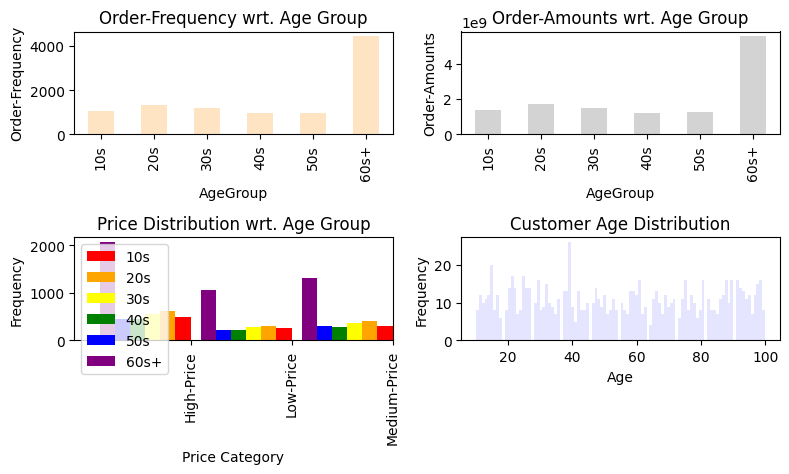

In [ ]:
# Age 그룹
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels)

# 2-1: 연령대에 따른 구매력 (구매 횟수) 비교
OrderFreq_Age = IntegOrders.groupby('AgeGroup')['OrderID'].count()

# 2-2: 연령대에 따른 구매력 (평균 주문 금액) 비교
OrderAmount_Age = IntegOrders.groupby('AgeGroup')['OrderAmount'].sum()

# 2-3: 연령대에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()
PriceDistrib_Age = PriceDistrib_Age.unstack()

# Plot 비교
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
OrderFreq_Age.plot(kind='bar', color='bisque')
plt.title('Order-Frequency wrt. Age Group')
plt.ylabel('Order-Frequency')

plt.subplot(2, 2, 2)
OrderAmount_Age.plot(kind='bar', color='lightgrey')
plt.title('Order-Amounts wrt. Age Group')
plt.ylabel('Order-Amounts')

plt.subplot(2, 2, 3)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(labels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price Distribution wrt. Age Group')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
IntegOrders.groupby('CustID')['Age'].first().plot.hist(alpha=0.1, bins=100, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



#### ==> 아래 plot 결과로부터 60세 이상의 연령대가 구매력이 높은 것 처럼 보이지만.. 난수 발생시 어느정도 uniform하게 연령대가 붙포할 텐데.
#### 60대 이상을 1-그룹으로 묶어서 비교하면서 표본수가 다른 연령대 대비 상대적으로 많아져서 보이는 현상
#### 평균 구매액  평균 구매 횟수로 재 탐색


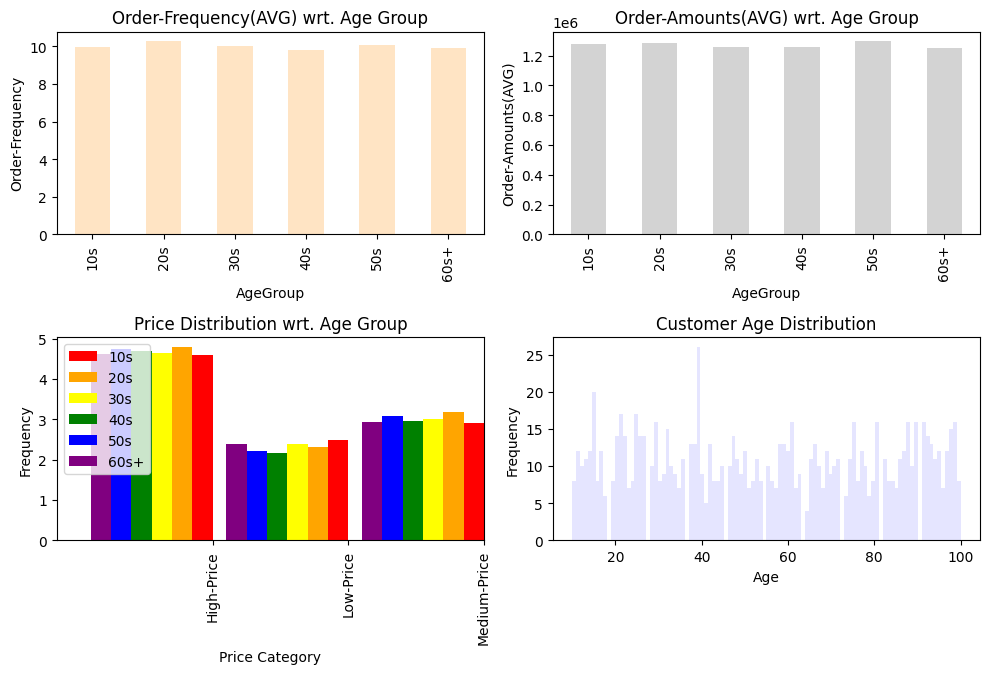

In [ ]:
# Age  연령 대별로 그룹핑
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels)

# 각 나이 그룹별 총 인원수 계산
AgeGroupCounts = IntegOrders.groupby('AgeGroup')['CustID'].nunique()
# 2-1: 연령대에 따른 구매력 (구매 횟수) 비교
# 모든 연령대가 고루 생성되어 60대 이상이 가장 많은 표본을 차지
# 각 나이 그룹별 주문 횟수를 해당 연령 그룹의 총 인원 수로 나눈 평균 주문 횟수
OrderFreq_Age = IntegOrders.groupby('AgeGroup')['OrderID'].count() / AgeGroupCounts

# 2-2: 연령대에 따른 구매력 (평균 주문 금액) 비교
AvgAmount_Age = IntegOrders.groupby('AgeGroup')['OrderAmount'].mean()

# 2-3: 연령대에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()/ AgeGroupCounts
PriceDistrib_Age = PriceDistrib_Age.unstack()

# Plot 비교
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
OrderFreq_Age.plot(kind='bar', color='bisque')
plt.title('Order-Frequency(AVG) wrt. Age Group')
plt.ylabel('Order-Frequency')

plt.subplot(2, 2, 2)
AvgAmount_Age.plot(kind='bar', color='lightgrey')
plt.title('Order-Amounts(AVG) wrt. Age Group')
plt.ylabel('Order-Amounts(AVG)')

plt.subplot(2, 2, 3)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(labels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price Distribution wrt. Age Group')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
IntegOrders.groupby('CustID')['Age'].first().plot.hist(alpha=0.1, bins=100, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel("Age")
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()



  (3) 지역 <br>
    - 지역에 따른 구매력 비교 <br>
        * 난수로 생성된 data라 실재 data에서 보여야할 skew가 전혀 반영이 안됨 <br>
        * 수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정 <br>

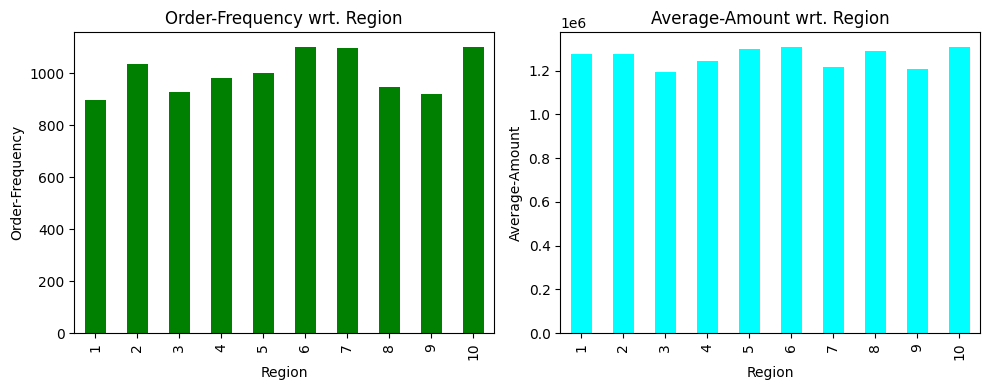

In [ ]:
# 3-1: 지역에 따른 구매력 (구매 횟수) 비교
OrderFreq_Region = IntegOrders.groupby('Region')['OrderID'].count()

# 3-2: 지역에 따른 구매력 (평균 구매액) 비교
AvgAmount_Region = IntegOrders.groupby('Region')['OrderAmount'].mean()

# Plot 비교
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
OrderFreq_Region.plot(kind='bar', color='g')
plt.title('Order-Frequency wrt. Region')
plt.ylabel('Order-Frequency')

plt.subplot(1, 2, 2)
AvgAmount_Region.plot(kind='bar', color='cyan')
plt.title('Average-Amount wrt. Region')
plt.ylabel('Average-Amount')

plt.tight_layout(); plt.show()


  (4) 취급 상품 가격 & 주문 총 구매액 <br>
    - 취급 상품 가격 & 주문 총 구매액의 경우 판매 사이트의 성향에 따라 주력 상품이 있고, 주로 거래하는 가격대들이 존재할 테지만 생성된 DB 는 모든 상품이 균일하게 판매되고, 구매 갯수 분포도 균일 <br>
    - 아래 취급 상품 가격 분포도를 보면 0원 근처와 25000원 근처에서 abnormal한 peak를 보이는데. 이는 DB를 처음 생성할 때 1-30에 해당하는 상품 코드에 대해 난수를 발생 시킨 후에 주문 정보 DB  생성 시 상품 코드 1-30에 대해서 10000개의 난수를 발생시키고, 다시 가격으로 mapping을 했기 때문에 처음 난수 발생 시에 작은 pool에서 난수를 발생 시켜서 발생하는 문제임
    - 가격 분포의 경우 모든 상품 가격대 (저가/중가/고가)에서 상품 개수를 0-100 사이로 주문하게 되는데, 상품 갯수가 작은 그룹들은 모두 아래쪽에서 중첩되게 되어 가격이 낮을 수록 histogram의 빈도수가 증가하는 현상.
        * 수정 사항 7: 상품 가격대 분포 조정 <br>
        * 수정 사항 8: 상품 구매액 분포 조정 <br>

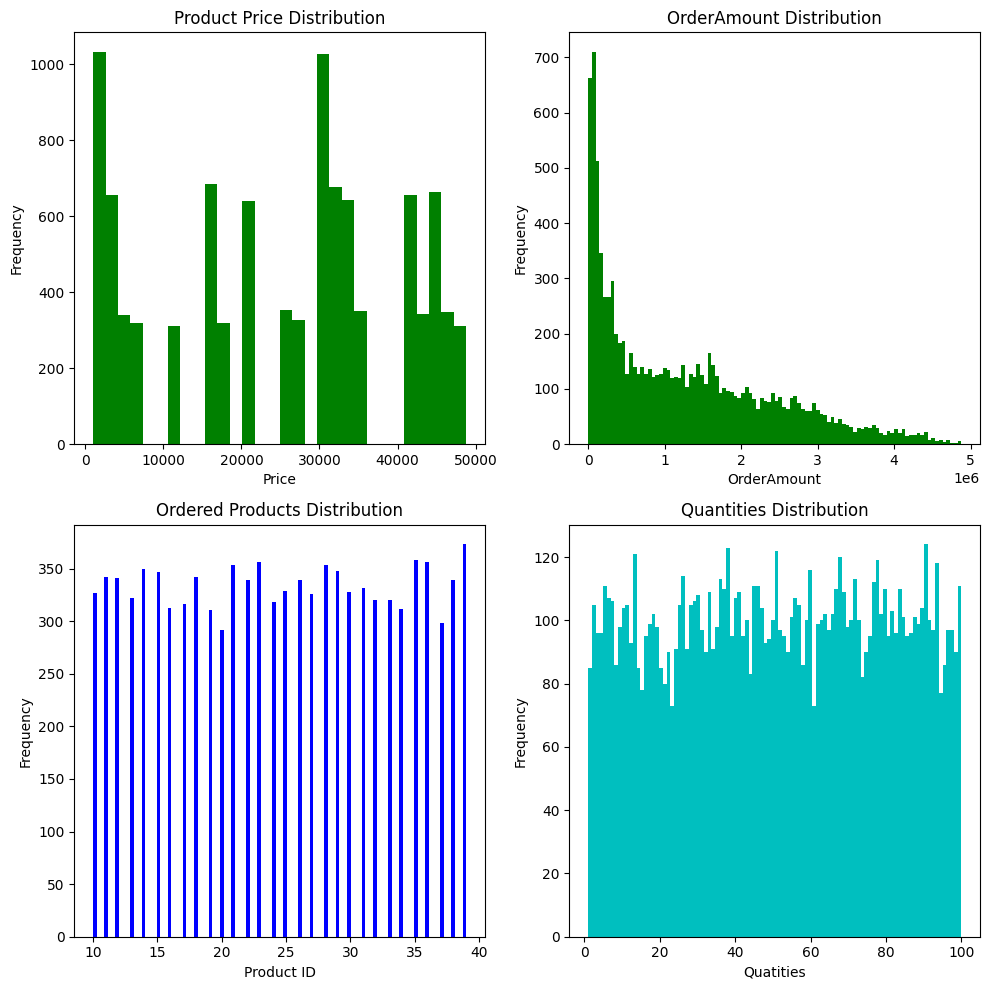

In [ ]:
## 4-1: 주문 list 들로 부터 상품 가격 분포, 주문총액 탐색
## Plot의 2nd-row: 주문 Item 번호 &  주문 수량
# Plot 비교
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
IntegOrders['Price'].plot.hist(alpha=1, bins=30, color='g')
plt.title('Product Price Distribution')
plt.xlabel("Price")
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
IntegOrders['OrderAmount'].plot.hist(alpha=1, bins=100, color='g')
plt.title('OrderAmount Distribution')
plt.xlabel("OrderAmount")
plt.ylabel('Frequency')


plt.subplot(2, 2, 3)
IntegOrders['ProdID'].plot.hist(alpha=1, bins=100, color='b')
plt.title('Ordered Products Distribution')
plt.xlabel("Product ID")
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
IntegOrders['Quantity'].plot.hist(alpha=1, bins=100, color='c')
plt.title('Quantities Distribution')
plt.xlabel("Quatities")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


  (5) 2020년 vs. 2021년 매출 비교 탐색 <br>
    - 2020 vs. 2021년 매출건수 매출액 균일 <br>
        * 수정 사항 9: 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영)<br>

2020년 총 매출 건수: 5055
2021년 총 매출 건수: 4945
2020년 총 매출액: 6355055100
2021년 총 매출액: 6276042200
2021년 대비 총 매출 건수 증가: -110
2021년 대비 총 매출액 증가: -79012900


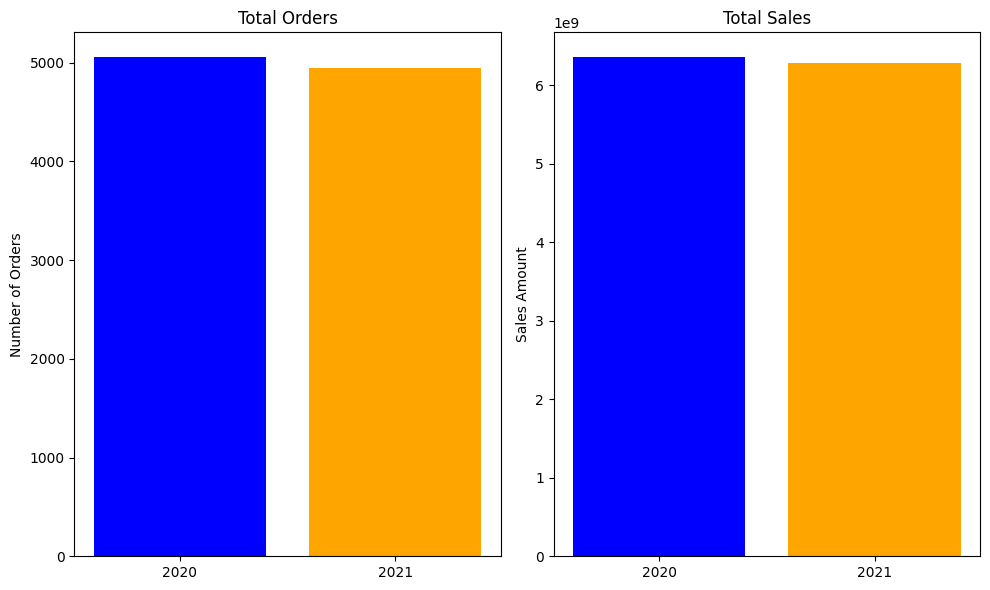

In [ ]:
# 주문 시간에서 연도(Year) 추출
IntegOrders['Year'] = IntegOrders['OrderDate'].dt.year

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders[IntegOrders['Year'] == 2020]
orders_2021 = IntegOrders[IntegOrders['Year'] == 2021]

# 2020년과 2021년 각각의 총 매출 건수와 총 매출액 계산
total_orders_2020 = orders_2020['OrderID'].nunique()
total_orders_2021 = orders_2021['OrderID'].nunique()

total_sales_2020 = orders_2020['OrderAmount'].sum()
total_sales_2021 = orders_2021['OrderAmount'].sum()

# 차이 계산
diff_total_orders = total_orders_2021 - total_orders_2020
diff_total_sales = total_sales_2021 - total_sales_2020

# 결과 출력
print("2020년 총 매출 건수:", total_orders_2020)
print("2021년 총 매출 건수:", total_orders_2021)
print("2020년 총 매출액:", total_sales_2020)
print("2021년 총 매출액:", total_sales_2021)
print("2021년 대비 총 매출 건수 증가:", diff_total_orders)
print("2021년 대비 총 매출액 증가:", diff_total_sales)

# 시각화
years = ['2020', '2021']
total_orders = [total_orders_2020, total_orders_2021]
total_sales = [total_sales_2020, total_sales_2021]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(years, total_orders, color=['blue', 'orange'])
plt.title('Total Orders')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
plt.bar(years, total_sales, color=['blue', 'orange'])
plt.title('Total Sales')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()


  (6) 계절별 / 주문 시간 대별 주문 빈도와 매출액 탐색 <br>
    - 계절별/주문시간별 매출 분포도 균일 <br>
    (Plot 결과에서 07:00~18:00 시간대에 주문량이 많아 보이는 이유는 단순히 시간 구간이 가장 넓어서임) <br>
        * 수정 사항 10: 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 <br>
        * 수정 사항 11: 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 수정 반영 <br>

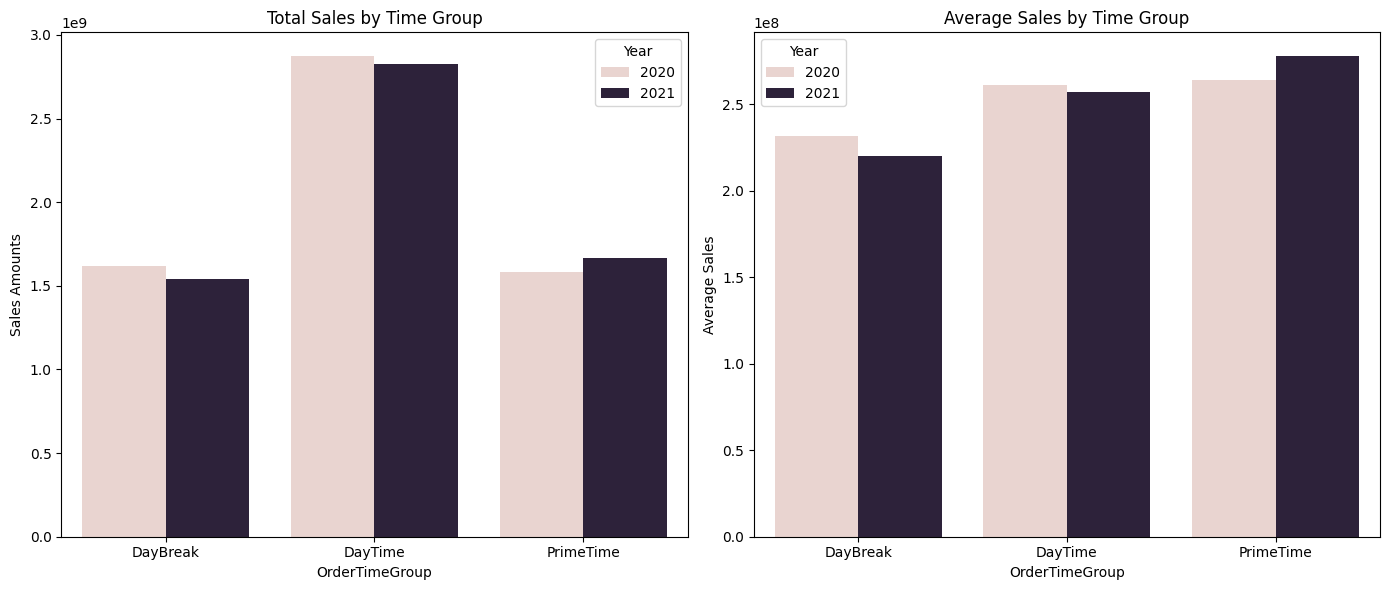

In [ ]:
# 시간 구간 정의
time_bins = [0, 7, 18, 25]

# 주문 시간대에 따라 그룹 나누기
IntegOrders['OrderTimeGroup'] = pd.cut(IntegOrders['OrderTime'], bins=time_bins, labels=['DayBreak', 'DayTime', 'PrimeTime'])

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders[IntegOrders['Year'] == 2020]
orders_2021 = IntegOrders[IntegOrders['Year'] == 2021]

# 시간 구간별 넓이 계산
time_bin_widths = [time_bins[i+1] - time_bins[i] for i in range(len(time_bins) - 1)]

# 시간대별 총 매출 건수와 총 매출액 계산
grouped_orders_2020 = orders_2020.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
    'AvgSales': x['OrderAmount'].sum() / time_bin_widths[x['OrderTimeGroup'].cat.codes.iloc[0]]
})).reset_index()

grouped_orders_2021 = orders_2021.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
    'AvgSales': x['OrderAmount'].sum() / time_bin_widths[x['OrderTimeGroup'].cat.codes.iloc[0]]
})).reset_index()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='OrderTimeGroup', y='TotalSales', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Total Sales by Time Group')
plt.ylabel('Sales Amounts')

plt.subplot(1, 2, 2)
sns.barplot(x='OrderTimeGroup', y='AvgSales', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Average Sales by Time Group')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()


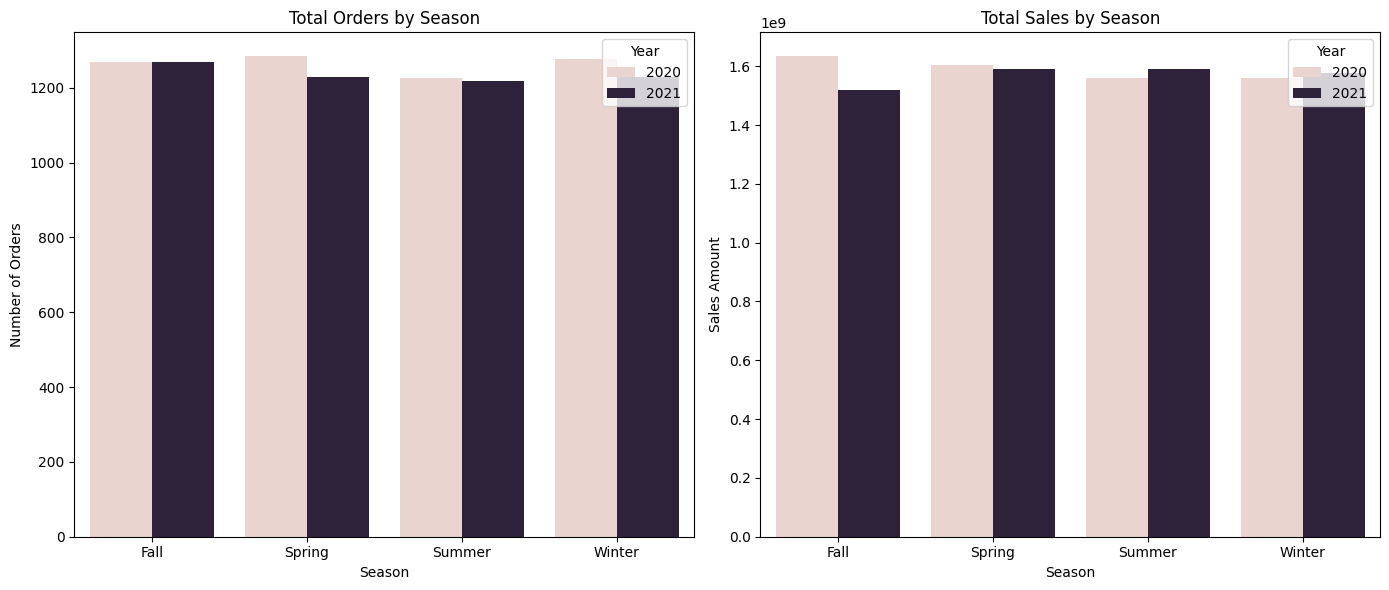

In [ ]:
# 주문 시간대에 따라 계절 나누기
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

IntegOrders['Season'] = IntegOrders['OrderDate'].dt.month.map(get_season)

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders[IntegOrders['Year'] == 2020]
orders_2021 = IntegOrders[IntegOrders['Year'] == 2021]

# 계절별 총 매출 건수와 총 매출액 계산
grouped_orders_2020_season = orders_2020.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()
grouped_orders_2021_season = orders_2021.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Season', y='OrderID', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Orders by Season')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
sns.barplot(x='Season', y='OrderAmount', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Sales by Season')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()


  (7) Correlation <br>
    - 변수들 간, 그리고 각 변수들과 매출액간 상관관계가 전혀 관찰 되지 않음
     <br>
    - OrderAmount=Price * Quantity의 수식으로 반영된 Correlation만 보임 <br>
        * (1) ~ (6) 까지의 탐색결과를 바탕으로 수정 후 Correlation변화 관찰 <br>

In [ ]:
# Correation 및 군집도 plot을 위한 DF copy & String으로 된 Columns Drop
IntegOrders2=IntegOrders.copy()
IntegOrders2.drop(columns=['OrderDW', 'AgeGroup', 'PriceCategory','Year',	'OrderTimeGroup',	'Season'], axis=1, inplace=True)

In [ ]:
CorrMrx=IntegOrders2.corr()
CorrMrx

,OrderID,CustID,OrderDate,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
OrderID,1.000000,-0.011252,0.001783,0.003832,-0.004665,-0.013832,0.017937,-0.007788,-0.004194,-0.006264,-0.006945
CustID,-0.011252,1.000000,0.005124,0.006837,-0.012275,0.000213,-0.066256,0.046231,-0.031377,-0.001586,-0.014671
OrderDate,0.001783,0.005124,1.000000,-0.007920,-0.009748,0.002214,0.006458,-0.003852,-0.000208,0.015094,0.007576
ProdID,0.003832,0.006837,-0.007920,1.000000,0.011554,-0.004835,0.000364,0.001435,-0.002476,-0.875294,-0.593733
Quantity,-0.004665,-0.012275,-0.009748,0.011554,1.000000,-0.005148,0.000017,-0.008735,-0.008494,-0.008550,0.616359
OrderTime,-0.013832,0.000213,0.002214,-0.004835,-0.005148,1.000000,-0.014640,-0.000880,0.010764,0.000068,-0.002037
Gender,0.017937,-0.066256,0.006458,0.000364,0.000017,-0.014640,1.000000,0.007395,-0.035854,0.008260,0.004900
Age,-0.007788,0.046231,-0.003852,0.001435,-0.008735,-0.000880,0.007395,1.000000,0.003204,0.004045,-0.007321
Region,-0.004194,-0.031377,-0.000208,-0.002476,-0.008494,0.010764,-0.035854,0.003204,1.000000,0.010939,0.003003
Price,-0.006264,-0.001586,0.015094,-0.875294,-0.008550,0.000068,0.008260,0.004045,0.010939,1.000000,0.679428


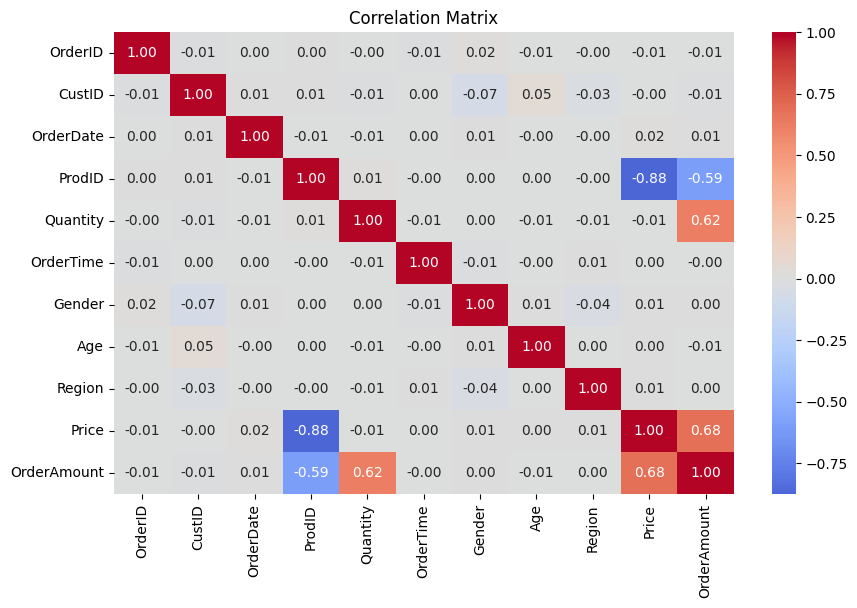

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(IntegOrders2.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

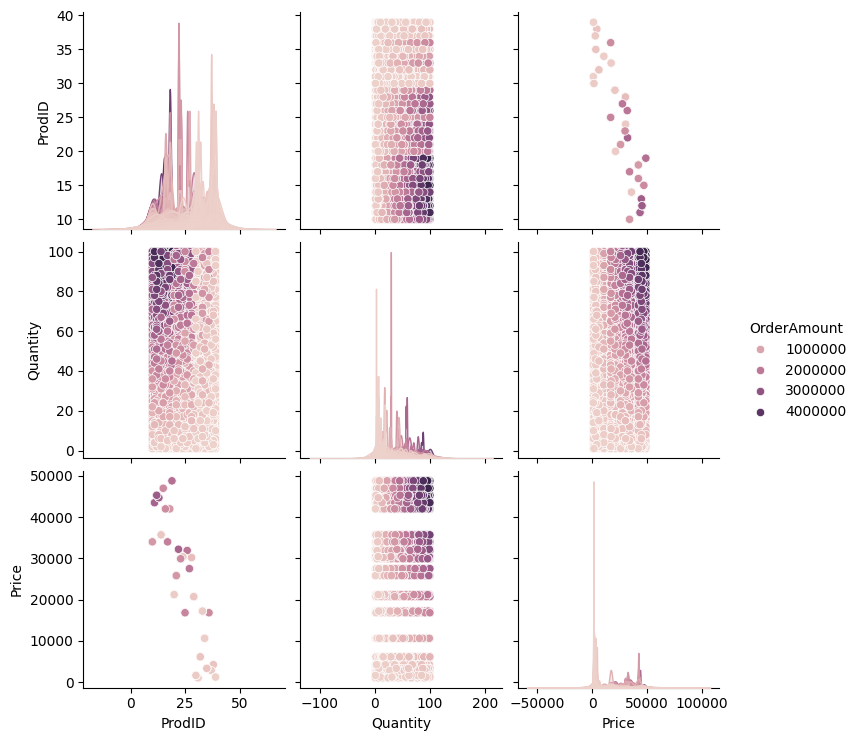

In [ ]:
IntegOrders3=IntegOrders2.copy()
IntegOrders3.drop(columns=['OrderID','CustID', 'OrderDate', 'OrderTime', 'Gender', 'Age', 'Region'], axis=1, inplace=True)
#sns.pairplot(IntegOrders3)
sns.pairplot(IntegOrders3, hue='OrderAmount')

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
######################### 고객 속성 데이터 생성을 위한 random Field 생성
CustID=np.arange(10001, 11001)                                                                                         ## 고객 ID
Gender=np.random.choice(2, size=1000)                                                                                   ## 고객 Gender Female: 0, Male: 1 # gender=np.random.randint(2, size=1000) 동일
Age=np.random.randint(10,101, size=1000)                                                                                ## 고객 나이 10~100세
Region=np.random.randint(1,11, size=1000)                                                                               ## 구매 고객 지역: 1~10 지역

######################### 고객 속성 DATAFRAME 생성
DF_Customers=pd.DataFrame(np.column_stack([CustID, Gender, Age, Region]), columns=['CustID', 'Gender', 'Age', 'Region'])


#########################  상품 ID 및 가격 정보 DB 생성
## Product ID 생성 (1~30)
ProdID = np.arange(10, 40)

# 상품 코드에 따른 가격 생성 (최소 단위 100원)
Price=[]
## 저가 상품 (1000~16300), 중가 상품 (16300~32600), 가 상품 (32600~50000) 생성
Price.extend(np.random.randint(337, 501, size=10)*100)
Price.extend(np.random.randint(174, 337, size=10)*100)
Price.extend(np.random.randint(10, 174, size=10)*100)

# 생성된 가격을 이용하여 DF_Prods 데이터프레임 생성
DF_Prods = pd.DataFrame({'ProdID': ProdID, 'Price': Price})

#########################  거래 데이터 생성을 위한 Random Field 생성
OrderID=np.arange(1, 10001)
CustID=np.random.randint(10001, 11001, size=10000)                                                                      ## 주문 ID
OrderDate=np.random.choice(pd.date_range(start='2020-01-01',end='2021-12-31', freq='D', normalize=True), size=10000)    ## 주문 시간
OrderDW=pd.to_datetime(OrderDate).day_name()                                                                            ## 주문 시간: 요일
ProdID=np.random.randint(10,40, size=10000)                                                                              ## 주문 상품 ID
Quantity=np.random.randint(1,101, size=10000)                                                                           ## 상품 주문 갯수
OrderTime = np.random.randint(1, 25, size=10000)                                                                        ## 주문 시간
# 주문 시간을 OrderDate 배열에 반영
OrderDate = [date + pd.Timedelta(hours=time) for date, time in zip(OrderDate, OrderTime)]


DF_Orders = pd.DataFrame({
    'OrderID': OrderID, 'CustID': CustID, 'OrderDate': OrderDate,'OrderDW': OrderDW,
    'ProdID': ProdID, 'Quantity': Quantity, 'OrderTime': OrderTime
})

#########################  고객 정보를 담은 1000 entries의 DF_Customers 와 주문 정보를 담은 10000 entries의 DF_Orders 통합 데이터 프레임 생성
# DF_Customers와 DF_Orders를 CustID 열을 기준으로 Merge ==> 고객/주문 정보 통합 DataFrame
MergedDF = pd.merge(DF_Orders, DF_Customers, on='CustID', how='left')

# IntegOrders에 ProdID에 해당하는 가격을 DF_Prods에서 가져와서 Price 컬럼 생성
IntegOrders = MergedDF.merge(DF_Prods, on='ProdID', how='left')

# OrderAmount 계산하여 OrderAmount 컬럼 추가
IntegOrders['OrderAmount'] = IntegOrders['Price'] * IntegOrders['Quantity']

IntegOrders.head()

,OrderID,CustID,OrderDate,OrderDW,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
0,1,10679,2020-05-30 21:00:00,Saturday,26,31,21,1,98,3,32900,1019900
1,2,10269,2020-10-11 21:00:00,Sunday,14,52,21,1,77,4,35700,1856400
2,3,10577,2020-12-10 08:00:00,Thursday,19,79,8,1,54,8,48800,3855200
3,4,10895,2021-06-01 00:00:00,Monday,35,34,24,0,13,4,3300,112200
4,5,10765,2021-08-19 15:00:00,Thursday,11,11,15,1,25,9,43500,478500


In [50]:
# Age  연령 대별로 그룹핑
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders['AgeGroup'] = pd.cut(IntegOrders['Age'], bins=bins, labels=labels)

# 1-3: 남/여에 따른 선호 상품 가격대
# 구매 상품의 가격대 분류
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders['PriceCategory'] = IntegOrders['Price'].apply(Price_Categ)

#### DB 변경 방향
  - 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가
  - 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정 <br>
  (남성의 경우 저가 상품 및 고가 상품의 비율이 낮고 상대적으로 중가 제품 선택 빈도 높음) <br>
  - 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
  - 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <br>
  (10대 저가 상품 선호, 40대 이상 고가품 선호로 수정) <br>
  - 수정 사항 5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경
  - 수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정
  - 수정 사항 7: 상품 가격대 분포 조정 ==> Multi-Peaks Gaussian Distribution 적용 <br>
  - 수정 사항 8: 상품 구매액 분포 조정 <br>
  - 수정 사항 9: 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영)<br>
  - 수정 사항 10: 수정 사항 10: 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 <br>
  - 수정 사항 11: 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 수정 반영 <br>

#### Data 수정
  - 변경작업의 편의성 및 변경 Logic 유지를 위해 DB 수정 순서는 위 수정 사항의 Label과는 별개로 진행

  - 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가
  - 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
  - 수정 사항 5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경 <br>
  - 수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정

  ==> CustID와의 consistency를 유지하면서 연령대 분포를 조정하기 위해서 조정하고자 하는 연령대의 나이를 +/- 방향으로 shift하거나 scaling factor로 조정가능하지만 그렇게 했을 경우 고령자의 분포가 아예 없어지는 문제도 발생하니, DF_customers를 생성할 때 가우시안 분포를 조정하여 생성하는 것이 합리적이라 판단


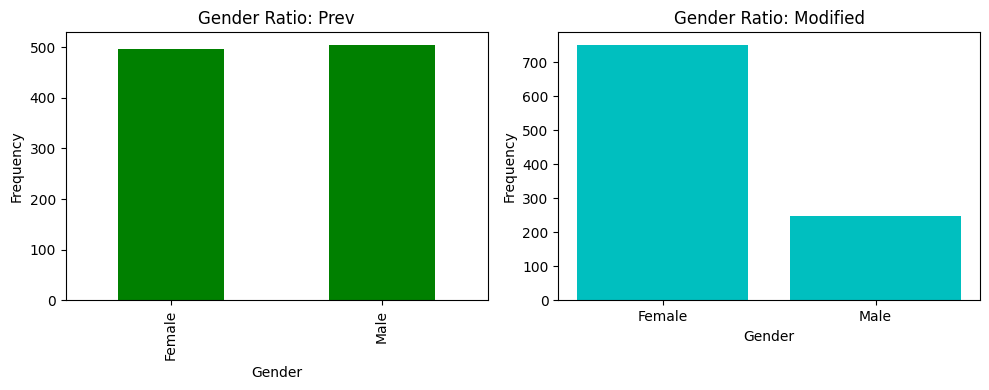

In [49]:
#################### 수정 사항 1: 남/여 고객비 조정, ==> 아래의 연령대 조정과 병합하여 수정 사항5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경
Gender_tmp=np.zeros(1000)
# 여성 75%, 남성 25%의 Target 남/여 성비를 갖도록 List 생성
Gender_tmp[:751] = 0
Gender_tmp[751:] = 1

# 랜덤 셔플
np.random.shuffle(Gender_tmp)

Gender_cnt = DF_Customers.groupby(['Gender']).size()
Gender_Mod_cnt = np.bincount(Gender_tmp.astype(int))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ax=Gender_cnt.plot(kind='bar', color='g')
ax.set_xticklabels(['Female', 'Male'])
plt.title('Gender Ratio: Prev')
plt.xlabel("Gender")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar([0, 1], Gender_Mod_cnt, color='c', tick_label=['Female', 'Male'])
plt.title('Gender Ratio: Modified')
plt.xlabel("Gender")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


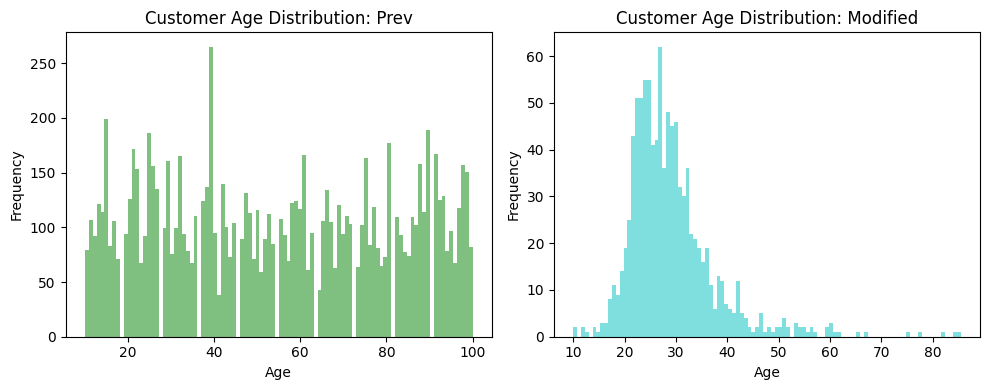

In [3]:
#################### 수정 사항 3: 고객 연령대 조정 (10대/60대이상 구매력을 낮추고, 20~30대, 40대 순으로 수정)
Age_tmp=[]
Age_tmp.extend(np.random.normal(loc=25, scale=4, size=500))
Age_tmp.extend(np.random.normal(loc=30, scale=5, size=350))
Age_tmp.extend(np.random.normal(loc=40, scale=10, size=120))
Age_tmp.extend(np.random.normal(loc=45, scale=20, size=30))
Age_tmp = np.clip(Age_tmp, 10, 100)
np.random.shuffle(Age_tmp)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
IntegOrders['Age'].plot.hist(alpha=0.5, bins=100, color='g')
plt.title('Customer Age Distribution: Prev')
plt.xlabel("Age")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Age_tmp, alpha=0.5, bins=100, color='c')
plt.title('Customer Age Distribution: Modified')
plt.xlabel("Age")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

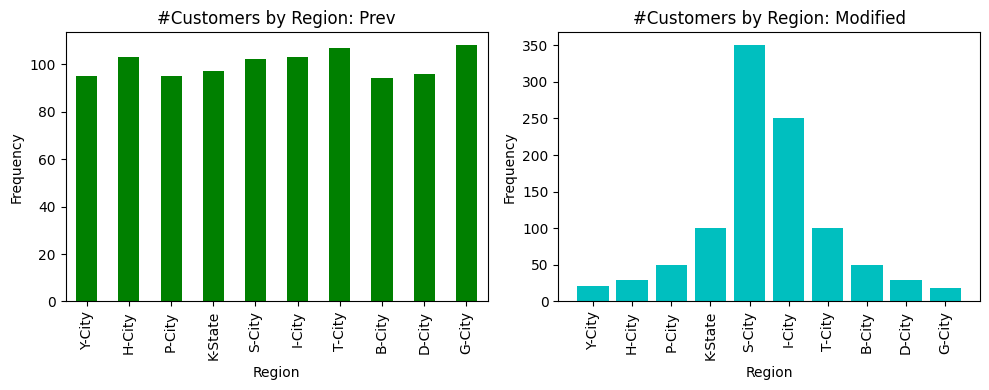

In [4]:
##################  수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정

Region_tmp=np.ones(1000)
# 여성 75%, 남성 25%의 Target 남/여 성비를 갖도록 List 생성
Region_tmp[1:21] = 1; Region_tmp[21:51] = 2; Region_tmp[51:101] = 3; Region_tmp[101:201] = 4; Region_tmp[201:551] = 5;
Region_tmp[551:801] = 6; Region_tmp[801:901] = 7; Region_tmp[901:951] = 8; Region_tmp[951:981] = 9; Region_tmp[981:1001] = 10;

# 랜덤 셔플
np.random.shuffle(Region_tmp)


# Region Labels
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
labels = ['Y-City', 'H-City', 'P-City','K-State', 'S-City', 'I-City', 'T-City', 'B-City', 'D-City','G-City']
DF_Customers['RegionName'] = pd.cut(DF_Customers['Region'], bins=bins, labels=labels)
Region_cnt = DF_Customers.groupby(['RegionName']).size()
Region_Mod_cnt = np.bincount((Region_tmp - 1).astype(int))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
Region_cnt.plot(kind='bar', color='g')
plt.title('#Customers by Region: Prev')
plt.xlabel("Region")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(labels, Region_Mod_cnt, color='c')
plt.title('#Customers by Region: Modified')
plt.xlabel("Region")
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [5]:
########################## Data Frame Update: 연령 분포, 남/여 성비, 주고객층 변경 반영

CustID_Mod=np.arange(10001, 11001)                              # DF_Orders에서 기존의 CustID는 Merge되면서 10000x1 로 변경되서 그냥은 DF로 만들 수 없음.
DF_Customers_Mod = pd.DataFrame(np.column_stack([CustID_Mod, Gender_tmp, Age_tmp, Region_tmp]), columns=['CustID', 'Gender', 'Age', 'Region'])


#########################  DF_Customers_Mod 와 주문 정보를 담은 10000 entries의 DF_Orders 통합 데이터 프레임 생성
# DF_Customers_Mod와 DF_Orders를 CustID 열을 기준으로 Merge ==> 고객/주문 정보 통합 DataFrame
MergedDF_Mod = pd.merge(DF_Orders, DF_Customers_Mod, on='CustID', how='left')

# IntegOrders에 ProdID에 해당하는 가격을 DF_Prods에서 가져와서 Price 컬럼 생성
IntegOrders_Mod = MergedDF_Mod.merge(DF_Prods, on='ProdID', how='left')

# OrderAmount 계산하여 OrderAmount 컬럼 추가
IntegOrders_Mod['OrderAmount'] = IntegOrders_Mod['Price'] * IntegOrders_Mod['Quantity']
IntegOrders_Mod[['Gender', 'Age', 'Region']] = IntegOrders_Mod[['Gender', 'Age', 'Region']].astype(int)

# Age 그룹
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders_Mod['AgeGroup'] = pd.cut(IntegOrders_Mod['Age'], bins=bins, labels=labels)

# 구매 상품의 가격대 분류
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders_Mod['PriceCategory'] = IntegOrders_Mod['Price'].apply(Price_Categ)

IntegOrders_Mod.head()

,OrderID,CustID,OrderDate,OrderDW,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount,AgeGroup,PriceCategory
0,1,10679,2020-05-30 21:00:00,Saturday,26,31,21,0,29,6,32900,1019900,20s,Medium-Price
1,2,10269,2020-10-11 21:00:00,Sunday,14,52,21,1,33,6,35700,1856400,30s,High-Price
2,3,10577,2020-12-10 08:00:00,Thursday,19,79,8,1,32,1,48800,3855200,30s,High-Price
3,4,10895,2021-06-01 00:00:00,Monday,35,34,24,0,30,1,3300,112200,20s,Low-Price
4,5,10765,2021-08-19 15:00:00,Thursday,11,11,15,0,33,6,43500,478500,30s,High-Price


  - 수정 사항 7: 상품 가격대 분포 조정 ==> Gaussian Distribution 적용 <br>
    - (AsIs) 상품 코드를 1-30까지 랜덤하게 생성, 1-10 상품코드에 대해서는 고가 33000~50000 원의 저가로 11-20까지의 상품 코드에 대해서는 17000-33000원의 중가로, 21-30까지의 상품코드에 대해서는 10000원 이하의 저가 상품으로 분류해서 랜덤하게 생성 <br>
      ==> 실제 상황을 반영해서 대략 40000원에 28000에 중심치를 피크 분포를 그리고, 10000 이하의 저가 상품에서는 소품 같은 5000원 근처 상품들이 주류를 이루도록 상품 가격 분포 조정: 주력 상품에 매출이 몰리는 상황 반영 <br>

    - 이러한 ideal 분포를 그리기엔 현재 상품 코드 (상품의 종류/기준가격)의 모수가 너무 작아 원하는 분포를 실현시키기엔 부족하여
    상품 ID/가격대를 수정 <br>


In [7]:
########################################## 수정 사항 7: 상품 가격대 분포 조정 ==> Multi-Peaks Gaussian Distribution 적용
ProdID_mod = np.arange(100, 400)

Price_mod=[]
## 저가 상품 (0~16300), 중가 상품 (16300~32600), 가 상품 (32600~50000) 생성
Price_mod.extend(np.random.randint(337, 501, size=100)*100)
Price_mod.extend(np.random.randint(174, 337, size=100)*100)
Price_mod.extend(np.random.randint(10, 174, size=100)*100)

# 생성된 가격을 이용하여 DF_Prods 데이터프레임 생성
DF_Prods_Mod = pd.DataFrame({'ProdID': ProdID_mod, 'Price': Price_mod})

##### 새로운 가격 분포를 생성해서 IntegOrders DataFrame에 업데이트
Price_tmp = []
## multi peak를 갖는 분포로 생성
Price_tmp.extend(np.random.normal(loc=40000, scale=1500, size=5000))  # 40000원 peak
Price_tmp.extend(np.random.normal(loc=28000, scale=4000, size=4500))  # 20000원 peak
Price_tmp.extend(np.random.normal(loc=5000, scale=1000, size=500))  # 10000원 peak

# 가격을 1000~50000원 범위 내로 clamping
Price_tmp = np.clip(Price_tmp, 1000, 50000)


for i in range(len(Price_tmp)):
    price_diff = np.abs(DF_Prods_Mod['Price'] - Price_tmp[i])  # 각 Price_tmp 값에 대해 DF_Prods의 Price와의 차이 계산
    min_idx = np.argmin(price_diff)  # 최소 차이를 가지는 인덱스
    min_prod_id = DF_Prods_Mod.loc[min_idx, 'ProdID']  # 최소 차이를 가지는 ProdID
    min_price = DF_Prods_Mod.loc[min_idx, 'Price']  # 최소 차이를 가지는 Price

    # Price_tmp와 일치하는 행의 Price와 ProdID 업데이트
    IntegOrders_Mod.loc[i, 'Price'] = min_price
    IntegOrders_Mod.loc[i, 'ProdID'] = min_prod_id


# 구매 상품의 가격대 분류
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders_Mod['PriceCategory'] = IntegOrders_Mod['Price'].apply(Price_Categ)

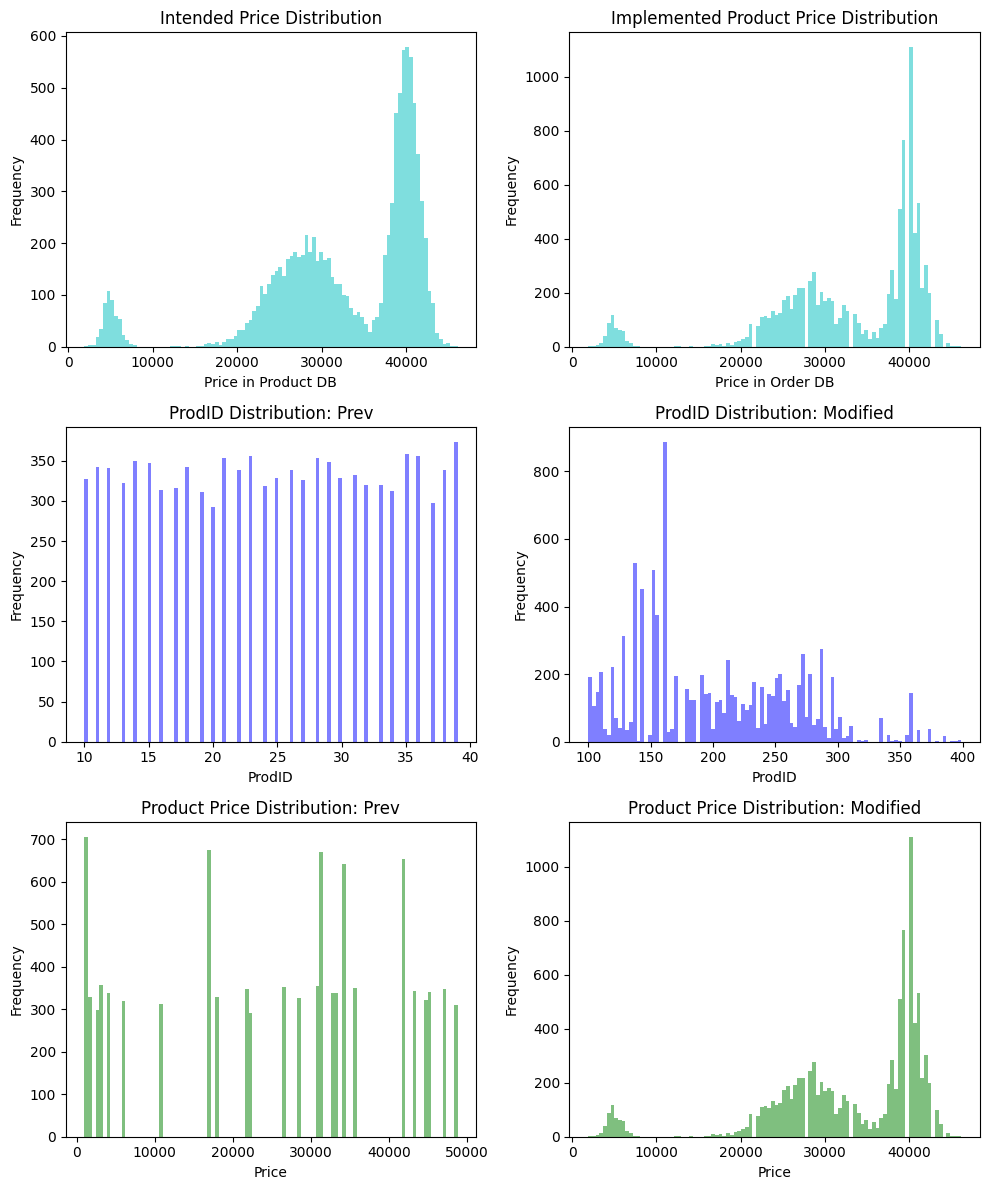

In [8]:
# Plot 비교
plt.figure(figsize=(10, 12))
plt.subplot(3, 2, 1)
plt.hist(Price_tmp,alpha=0.5, bins=100, color='c')
plt.title('Intended Price Distribution')
plt.xlabel("Price in Product DB")
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
IntegOrders_Mod['Price'].plot.hist(alpha=0.5, bins=100, color='c')
plt.title('Implemented Product Price Distribution')
plt.xlabel("Price in Order DB")
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
IntegOrders['ProdID'].plot.hist(alpha=0.5, bins=100, color='b')
plt.title('ProdID Distribution: Prev')
plt.xlabel("ProdID")
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
IntegOrders_Mod['ProdID'].plot.hist(alpha=0.5, bins=100, color='b')
plt.title('ProdID Distribution: Modified')
plt.xlabel("ProdID")
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
IntegOrders['Price'].plot.hist(alpha=0.5, bins=100, color='g')
plt.title('Product Price Distribution: Prev')
plt.xlabel("Price")
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
IntegOrders_Mod['Price'].plot.hist(alpha=0.5, bins=100, color='g')
plt.title('Product Price Distribution: Modified')
plt.xlabel("Price")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

  - 수정 사항 8: 상품 구매액 분포 조정 <br>
    - 이전의 총구매액의 분포는 비이상적으로 4-5백만원 정도까지도 균일하게 분포하는 경향을 보였는데, 인터넷 주문 사이트에서 대다수 수량을 1-5개 정도 구매하는게 주류이므로 실제 상황을 반영, 수정하여  수만원 정도의 구매액이 가장 많은 빈도수를 차지하도록 수정

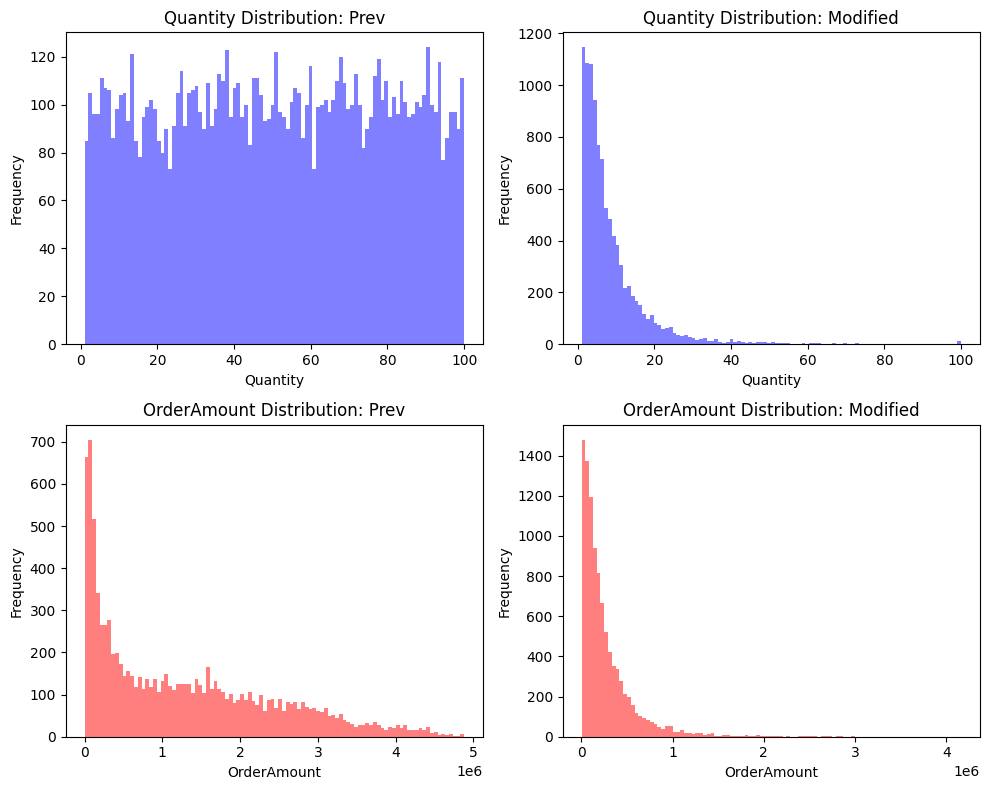

In [9]:
# 로그-정규 분포의 평균과 표준편차 설정
log_normal_mean = 1.8  # 로그-정규 분포의 평균
log_normal_std = 0.9  # 로그-정규 분포의 표준편차

# 로그-정규 분포를 따르는 주문 수량 생성
quantity = np.random.lognormal(mean=log_normal_mean, sigma=log_normal_std, size=len(IntegOrders))

# 생성된 주문 수량을 정수형으로 변환 후 클램핑
quantity = np.clip(quantity, 1, 100)  # 최소 주문 수량은 1개, 최대 주문 수량은 100개로 클램핑
quantity = quantity.astype(int)  # 정수형으로 변환

# IntegOrders 데이터프레임에 주문 수량 열 추가
IntegOrders_Mod['Quantity'] = quantity
IntegOrders_Mod['OrderAmount'] = IntegOrders_Mod['Price'] * IntegOrders_Mod['Quantity']

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
IntegOrders['Quantity'].plot.hist(alpha=0.5, bins=100, color='b')
plt.title('Quantity Distribution: Prev')
plt.xlabel("Quantity")
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
IntegOrders_Mod['Quantity'].plot.hist(alpha=0.5, bins=100, color='b')
plt.title('Quantity Distribution: Modified')
plt.xlabel("Quantity")
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
IntegOrders['OrderAmount'].plot.hist(alpha=0.5, bins=100, color='r')
plt.title('OrderAmount Distribution: Prev')
plt.xlabel("OrderAmount")
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
IntegOrders_Mod['OrderAmount'].plot.hist(alpha=0.5, bins=100, color='r')
plt.title('OrderAmount Distribution: Modified')
plt.xlabel("OrderAmount")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

  - 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <br>
  - 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정  <br>
  (10대 저가 상품 선호, 40대 이상 고가품 선호로 수정,<br>
   남성의 경우 저가 상품 및 고가 상품의 비율이 낮고 상대적으로 중가 제품 선택 빈도 높음) <br>

In [10]:
#################################################################################################
################# 연령대에 따른 선호 상품 금액대 조정

#### 40대 이상이면서 저가형 Product ID가 300번대 제품을 구매한 경우에 이를 고가형 제품 구매로 변경하고 해당하는
#### Product ID (-200)과 그에 대응되는 DF_Prod의 "Price" 컬럼의 가격으로 수정해서 consistency 유지
#### 이 때 모든 구매 물품을 변경하지는 않고, 40대의 경우 저가 제품 구매이면서, ProdID가 짝수 인경우에만
#### 50대의 경우 3의 배수, 60대 이상의 경우 5의 배수인경우에만 변경하는 로직을 반영

# IntegOrders_Mod DataFrame에서 Age가 40 이상이고 PriceCategory가 Low-Price인 경우
condition = (IntegOrders_Mod['Age'] >= 40) & (IntegOrders_Mod['PriceCategory'] == 'Low-Price')

# AgeGroup에 따라 저가형 품목에서 고가형 품목으로 변경하는 비율 설정
age_group_ratios = {'40s': 2, '50s': 3, '60s+': 5}

# AgeGroup에 따라 변경하는 portion 조정
for age_group, ratio in age_group_ratios.items():
    if age_group == '40s':
        condition_age_group = condition & (IntegOrders_Mod['AgeGroup'] == age_group) & (IntegOrders_Mod['ProdID'] % 2 == 0)
    elif age_group == '50s':
        condition_age_group = condition & (IntegOrders_Mod['AgeGroup'] == age_group) & (IntegOrders_Mod['ProdID'] % 3 == 0)
    elif age_group == '60s+':
        condition_age_group = condition & (IntegOrders_Mod['AgeGroup'] == age_group) & (IntegOrders_Mod['ProdID'] % 5 == 0)

    # 해당 조건을 만족하는 행의 인덱스 선택
    indices = IntegOrders_Mod.index[condition_age_group].tolist()

    # 해당 인덱스를 기반 Price 및 ProdID를 업데이트
    for index in indices:
        # ProdID를 200 감소. 저가형제품에서 고가형 제품으로
        IntegOrders_Mod.at[index, 'ProdID'] -= 200

        # 업데이트된 ProdID에 해당하는 Price를 DF_Prods_Mod에서 가져와 업데이트
        prod_id = IntegOrders_Mod.at[index, 'ProdID']
        new_price = DF_Prods_Mod.loc[DF_Prods_Mod['ProdID'] == prod_id, 'Price'].values[0]
        IntegOrders_Mod.at[index, 'Price'] = new_price


#### 10대 이면서 고가형 Product.. ID가 100번대 제품을 구매한 경우에 이를 저가형 제품 구매로 변경
condition = (IntegOrders_Mod['Age'] <= 19) & (IntegOrders_Mod['PriceCategory'] == 'High-Price')
condition_age_group = condition &  (IntegOrders_Mod['ProdID'] % 2 == 0)
indices = IntegOrders_Mod.index[condition_age_group].tolist()
for index in indices:
# ProdID를 200 증가. 고가형제품에서 저가형 제품으로
  IntegOrders_Mod.at[index, 'ProdID'] += 200
  prod_id = IntegOrders_Mod.at[index, 'ProdID']
  new_price = DF_Prods_Mod.loc[DF_Prods_Mod['ProdID'] == prod_id, 'Price'].values[0]
  IntegOrders_Mod.at[index, 'Price'] = new_price



# 구매 상품의 가격대 분류 업데이트
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders_Mod['PriceCategory'] = IntegOrders_Mod['Price'].apply(Price_Categ)

#################################################################################################
################# 남/여에 따른 선호 상품 금액대 조정

condition = (IntegOrders_Mod['Gender'] == 1) & (IntegOrders_Mod['PriceCategory'] == 'High-Price')
condition_age_group = condition &  (IntegOrders_Mod['ProdID'] % 2 == 0)
indices = IntegOrders_Mod.index[condition_age_group].tolist()
for index in indices:
# ProdID를 100 증가. 고가형제품에서 중가형 제품으로
  IntegOrders_Mod.at[index, 'ProdID'] += 100
# 업데이트된 ProdID에 해당하는 Price를 DF_Prods_Mod에서 가져와 업데이트
  prod_id = IntegOrders_Mod.at[index, 'ProdID']
  new_price = DF_Prods_Mod.loc[DF_Prods_Mod['ProdID'] == prod_id, 'Price'].values[0]
  IntegOrders_Mod.at[index, 'Price'] = new_price

condition = (IntegOrders_Mod['Gender'] == 1) & (IntegOrders_Mod['PriceCategory'] == 'Low-Price')
condition_age_group = condition &  (IntegOrders_Mod['ProdID'] % 2 == 0)
indices = IntegOrders_Mod.index[condition_age_group].tolist()
for index in indices:
# ProdID를 100 감소. 저가형제품에서 중가형 제품으로
  IntegOrders_Mod.at[index, 'ProdID'] -= 100
# 업데이트된 ProdID에 해당하는 Price를 DF_Prods_Mod에서 가져와 업데이트
  prod_id = IntegOrders_Mod.at[index, 'ProdID']
  new_price = DF_Prods_Mod.loc[DF_Prods_Mod['ProdID'] == prod_id, 'Price'].values[0]
  IntegOrders_Mod.at[index, 'Price'] = new_price


# 구매 상품의 가격대 분류 업데이트
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders_Mod['PriceCategory'] = IntegOrders_Mod['Price'].apply(Price_Categ)

# Age  연령 대별로 그룹 업데이트
bins = [10, 20, 30, 40, 50, 60, np.inf]
labels = ['10s', '20s', '30s', '40s', '50s', '60s+']
IntegOrders_Mod['AgeGroup'] = pd.cut(IntegOrders_Mod['Age'], bins=bins, labels=labels)

# OrderAmount 계산하여 OrderAmount 컬럼 업데이트
IntegOrders_Mod['OrderAmount'] = IntegOrders_Mod['Price'] * IntegOrders_Mod['Quantity']

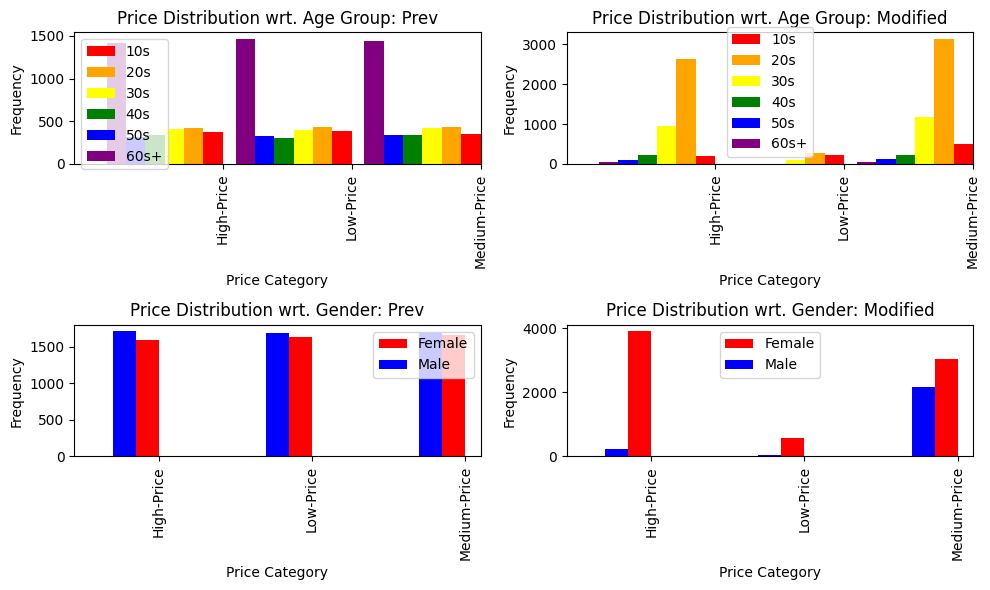

In [51]:
# 연령대에 따른 선호 상품 가격대 비교
# 구매 상품의 가격대 분류
AgeLabels = ['10s', '20s', '30s', '40s', '50s', '60s+']
PriceDistrib_Age = IntegOrders.groupby(['AgeGroup', 'PriceCategory']).size()
PriceDistrib_Age = PriceDistrib_Age.unstack()

PriceDistrib_Age_Mod = IntegOrders_Mod.groupby(['AgeGroup', 'PriceCategory']).size()
PriceDistrib_Age_Mod = PriceDistrib_Age_Mod.unstack()

GenderList = [0, 1]
GenderLabels = ['Female', 'Male']
PriceDistrib_Gender = IntegOrders.groupby(['Gender', 'PriceCategory']).size()
PriceDistrib_Gender = PriceDistrib_Gender.unstack()

PriceDistrib_Gender_Mod = IntegOrders_Mod.groupby(['Gender', 'PriceCategory']).size()
PriceDistrib_Gender_Mod = PriceDistrib_Gender_Mod.unstack()

# Plot 비교
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(AgeLabels):
    PriceDistrib_Age.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price Distribution wrt. Age Group: Prev')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, age_group in enumerate(AgeLabels):
    PriceDistrib_Age_Mod.loc[age_group].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=age_group)
plt.title('Price Distribution wrt. Age Group: Modified')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
colors = ['red', 'blue']
for i, Gender in enumerate(GenderList):
    PriceDistrib_Gender.loc[Gender].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=GenderLabels[i])
plt.title('Price Distribution wrt. Gender: Prev')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()


plt.subplot(2, 2, 4)
colors = ['red', 'blue']
for i, Gender in enumerate(GenderList):
    PriceDistrib_Gender_Mod.loc[Gender].plot(kind='bar', color=colors[i], width=0.15, position=i+1, label=GenderLabels[i])
plt.title('Price Distribution wrt. Gender: Modified')
plt.xlabel('Price Category')
plt.ylabel('Frequency')
plt.legend()


plt.tight_layout()
plt.show()


- 수정 사항 9: 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영)<br>
- 수정 사항 11: 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 수정 반영 <br>

In [35]:
IntegOrders_Mod.drop(['OrderDate', 'OrderDW', 'OrderTime'], axis=1, inplace=True)

OrderDate_mod=[]
## 주문 일자 생성
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2020-01-01',end='2020-03-31', freq='D', normalize=True), size=400))
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2020-04-01',end='2020-06-30', freq='D', normalize=True), size=400))
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2020-07-01',end='2020-09-30', freq='D', normalize=True), size=1200))
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2020-10-01',end='2020-12-31', freq='D', normalize=True), size=1400))

OrderDate_mod.extend(np.random.choice(pd.date_range(start='2021-01-01',end='2021-03-31', freq='D', normalize=True), size=1750))
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2021-04-01',end='2021-06-30', freq='D', normalize=True), size=1500))
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2021-07-01',end='2021-09-30', freq='D', normalize=True), size=1500))
OrderDate_mod.extend(np.random.choice(pd.date_range(start='2021-10-01',end='2021-12-31', freq='D', normalize=True), size=1850))

OrderDW_mod=pd.to_datetime(OrderDate).day_name()                                                                            ## 주문 시간: 요일

# 업데이트된 OrderDate_mod, OrderDW_mod, OrderTime_mod를 IntegOrders_Mod 데이터프레임에 추가
IntegOrders_Mod['OrderDate'] = pd.to_datetime(OrderDate_mod)  # OrderDate_mod를 날짜로 변환하여 저장
IntegOrders_Mod['OrderDW'] = OrderDW_mod


# 각 시간대별 주문 빈도 조정
order_freq_by_hour = {
    (0, 8): 200,    # 1~7시: 200건
    (8, 13): 400,   # 8~12시: 400건
    (13, 15): 800,  # 13~14시: 800건
    (15, 20): 1000, # 15~19시: 1000건
    (20, 24): 7600  # 20~24시: 7600건
}

# 각 시간대별로 반복하여 시간과 분 생성
OrderTime_mod = []
for start_hour, end_hour in order_freq_by_hour.keys():
    num_orders = order_freq_by_hour[(start_hour, end_hour)]
    for _ in range(num_orders):
        # 시간 생성
        hour = np.random.randint(start_hour, end_hour)  # 해당 시간대에서 시간을 무작위로 선택
        # 분 생성
        minute = np.random.randint(0, 60)  # 분은 0부터 59까지의 난수
        second = np.random.randint(0, 60)  # 초는 0부터 59까지의 난수
        time_str = f'{hour:02d}:{minute:02d}:{second:02d}'  # 시간을 HH:MM:SS 형식의 문자열로 변환
        OrderTime_mod.append(time_str)

np.random.shuffle(OrderTime_mod)

# OrderTime 컬럼에 시간 정보 저장
IntegOrders_Mod['OrderTime'] = OrderTime_mod

# 날짜와 시간을 합쳐서 OrderDate 컬럼에 저장
IntegOrders_Mod['OrderDate'] = IntegOrders_Mod['OrderDate'].dt.strftime('%Y-%m-%d') + ' ' + IntegOrders_Mod['OrderTime']

IntegOrders_Mod['OrderDate'] = pd.to_datetime(IntegOrders_Mod['OrderDate'])  # 문자열을 datetime 형식으로 변환

# 주문 시간에서 연도(Year) 추출
IntegOrders_Mod['Year'] = IntegOrders_Mod['OrderDate'].dt.year

# 계절에 따라 그룹 나누기
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

IntegOrders_Mod['Season'] = IntegOrders_Mod['OrderDate'].dt.month.map(get_season)

# 주문 시간대에 따라 그룹 나누기
time_bins = [0, 7, 18, 25]
IntegOrders_Mod['OrderTimeGroup'] = pd.cut(IntegOrders_Mod['OrderDate'].dt.hour, bins=time_bins, labels=['DayBreak', 'DayTime', 'PrimeTime'])


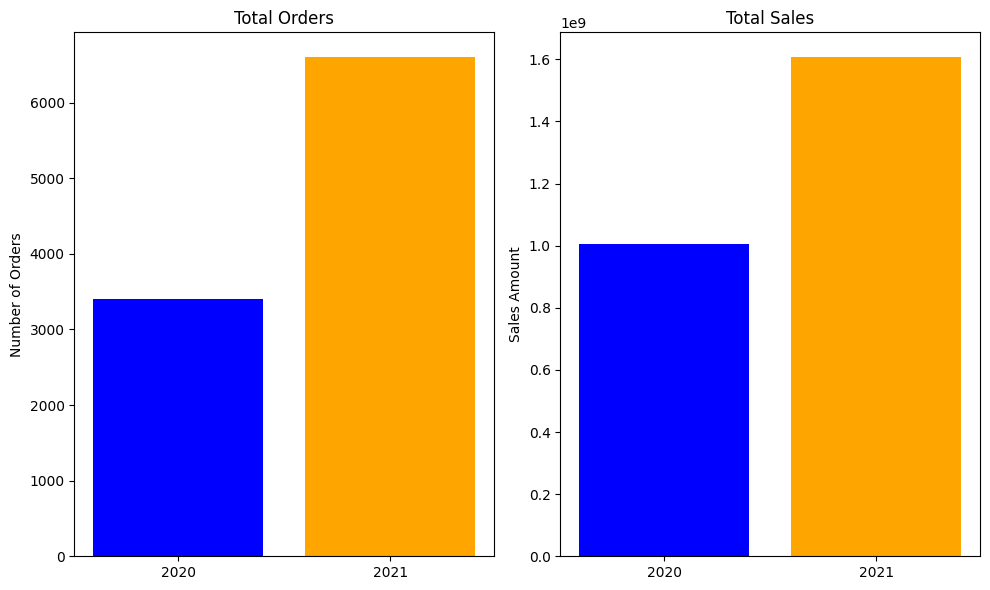

In [36]:

# 2020년과 2021년의 주문 데이터 분리
orders_2020 = IntegOrders_Mod[IntegOrders_Mod['Year'] == 2020]
orders_2021 = IntegOrders_Mod[IntegOrders_Mod['Year'] == 2021]

# 2020년과 2021년 각각의 총 매출 건수와 총 매출액 계산
total_orders_2020 = orders_2020['OrderID'].nunique()
total_orders_2021 = orders_2021['OrderID'].nunique()

total_sales_2020 = orders_2020['OrderAmount'].sum()
total_sales_2021 = orders_2021['OrderAmount'].sum()

# 차이 계산
diff_total_orders = total_orders_2021 - total_orders_2020
diff_total_sales = total_sales_2021 - total_sales_2020

# # 결과 출력
# print("2020년 총 매출 건수:", total_orders_2020)
# print("2021년 총 매출 건수:", total_orders_2021)
# print("2020년 총 매출액:", total_sales_2020)
# print("2021년 총 매출액:", total_sales_2021)
# print("2020년 대비 2021년 총 매출 건수 증가:", diff_total_orders)
# print("2020년 대비 2021년 총 매출액 증가:", diff_total_sales)

# 시각화
years = ['2020', '2021']
total_orders = [total_orders_2020, total_orders_2021]
total_sales = [total_sales_2020, total_sales_2021]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(years, total_orders, color=['blue', 'orange'])
plt.title('Total Orders')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
plt.bar(years, total_sales, color=['blue', 'orange'])
plt.title('Total Sales')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()

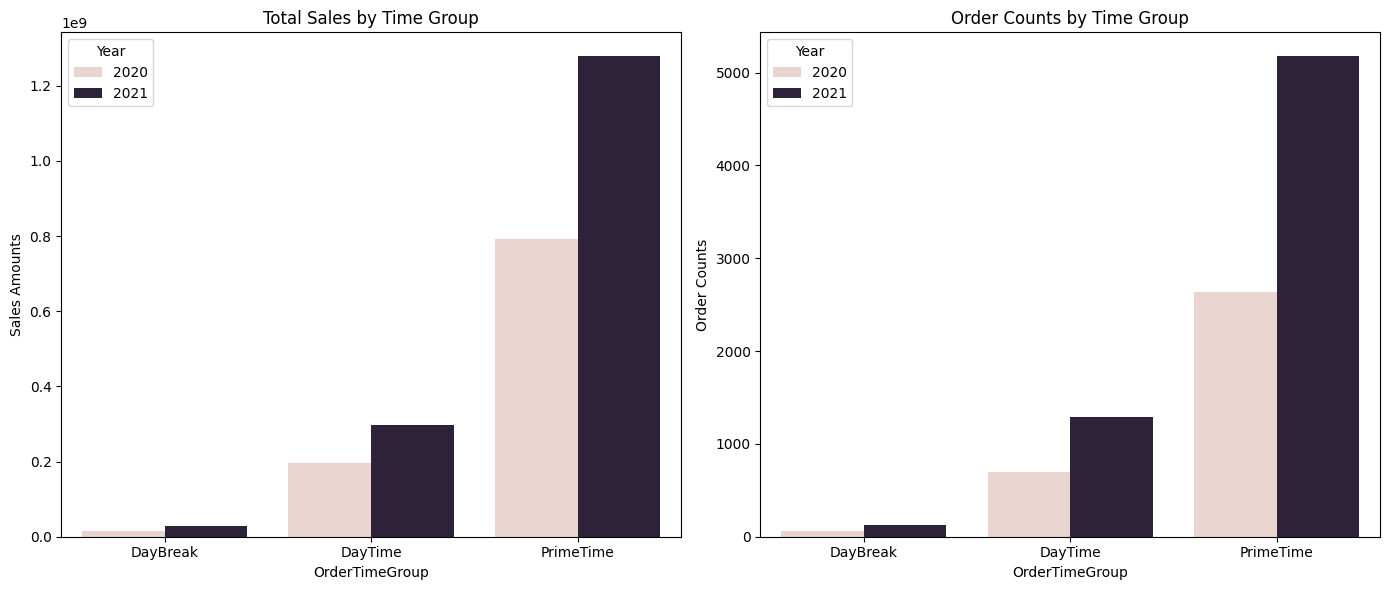

In [37]:
# 시간대별 총 매출 건수와 총 매출액 계산
grouped_orders_2020 = orders_2020.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
})).reset_index()

grouped_orders_2021 = orders_2021.groupby(['OrderTimeGroup', 'Year']).apply(lambda x: pd.Series({
    'OrderCount': x['OrderID'].nunique(),
    'TotalSales': x['OrderAmount'].sum(),
})).reset_index()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='OrderTimeGroup', y='TotalSales', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Total Sales by Time Group')
plt.ylabel('Sales Amounts')

plt.subplot(1, 2, 2)
sns.barplot(x='OrderTimeGroup', y='OrderCount', hue='Year', data=pd.concat([grouped_orders_2020, grouped_orders_2021]))
plt.title('Order Counts by Time Group')
plt.ylabel('Order Counts')

plt.tight_layout()
plt.show()


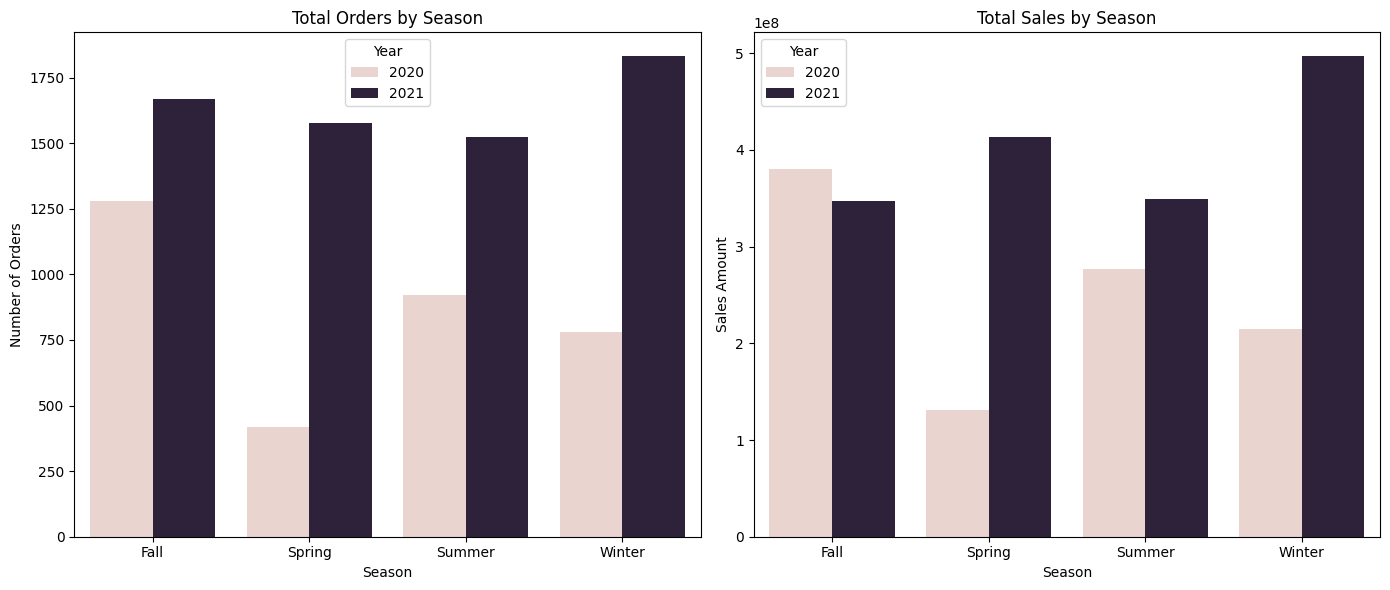

In [38]:
grouped_orders_2020_season = orders_2020.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()
grouped_orders_2021_season = orders_2021.groupby(['Season', 'Year']).agg({'OrderID': 'nunique', 'OrderAmount': 'sum'}).reset_index()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Season', y='OrderID', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Orders by Season')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
sns.barplot(x='Season', y='OrderAmount', hue='Year', data=pd.concat([grouped_orders_2020_season, grouped_orders_2021_season]))
plt.title('Total Sales by Season')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()

In [42]:
IntegOrders_Mod['Season'].unique()

array(['Spring', 'Winter', 'Summer', 'Fall'], dtype=object)

- 수정 사항 10: 수정 사항 10: 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 <br>

In [43]:
#################################################################################################
################# 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영

#### Season이 가을과 겨울일 경우 Product ID가 300번대  저가형  제품을 구매한 경우에 이를 고가형 제품 구매로 변경하고 해당하는
#### Product ID (-200)과 그에 대응되는 DF_Prod의 "Price" 컬럼의 가격으로 수정해서 consistency 유지
#### 겨울은 짝수인 경우에 가을은 3의 배수인 경우에만 변경


# AgeGroup에 따라 저가형 품목에서 고가형 품목으로 변경하는 비율 설정
season_group_ratios = {'Winter': 2, 'Fall': 5}

# AgeGroup에 따라 변경하는 portion 조정
for season_group, ratio in season_group_ratios.items():
  condition_season_group = (IntegOrders_Mod['Season'] == age_group) & (IntegOrders_Mod['ProdID'] % ratio == 0)
  # 해당 조건을 만족하는 행의 인덱스 선택
  indices = IntegOrders_Mod.index[condition_season_group].tolist()
  # 해당 인덱스를 기반 Price 및 ProdID를 업데이트
  for index in indices:
    # ProdID를 200 감소. 저가형제품에서 고가형 제품으로
    IntegOrders_Mod.at[index, 'ProdID'] -= 200
    # 업데이트된 ProdID에 해당하는 Price를 DF_Prods_Mod에서 가져와 업데이트
    prod_id = IntegOrders_Mod.at[index, 'ProdID']
    new_price = DF_Prods_Mod.loc[DF_Prods_Mod['ProdID'] == prod_id, 'Price'].values[0]
    IntegOrders_Mod.at[index, 'Price'] = new_price

# 구매 상품의 가격대 분류 업데이트
def Price_Categ(price):
  if price <= 17300: return 'Low-Price'
  elif price <= 33600:    return 'Medium-Price'
  else: return 'High-Price'

IntegOrders_Mod['PriceCategory'] = IntegOrders_Mod['Price'].apply(Price_Categ)